In [1]:
import json
from collections import Counter
from hazm import word_tokenize, Normalizer

from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

normalizer = Normalizer()

In [7]:
with open('../data/CS-Stack.json') as f:
    data = json.load(f)

In [8]:
type(data)

dict

In [9]:
msg_iter = iter(data['messages'])

In [10]:
next(msg_iter)

{'id': 1,
 'type': 'service',
 'date': '2021-07-06T00:16:27',
 'actor': 'CS Stackoverflow [IRAN]',
 'actor_id': 'channel1564092519',
 'action': 'migrate_from_group',
 'title': 'CS Stackoverflow [IRAN]',
 'text': ''}

In [11]:
stop_words = open('../data/stop-words.txt').readlines()
stop_words = list(map(str.strip , stop_words))
stop_words = list(map(normalizer.normalize , stop_words))


In [12]:
#see what was the message that stopped the loop
# text_content = ''

# for msg in data['messages'] :
#     try :
#         text_content += msg['text']
#     except TypeError:
#         print(msg)
#         break

In [13]:
text_content = ''

for msg in data['messages']:
    if type(msg['text']) is str:
        tokens = word_tokenize(msg['text'])
        tokens = list(filter(lambda item: item not in stop_words , tokens))
        text_content += f" {' '.join(tokens)}" 

# text_content = 'من با علی , خرید علی رفتم خرید.'

In [16]:
#Normalize and reshape for final word cloud
# print(text_content)
# text_content = normalizer.normalize(text_content)
# print(text_content)
text_content = arabic_reshaper.reshape(text_content)
# print(text_content)
# text_content = get_display(text_content)     
# print(text_content)

IndexError: list index out of range

In [ ]:
# Counter(text_content.split()).most_common()

In [15]:
wordcloud = WordCloud(
            width=1200 , height=1200 , 
            font_path=str('../data/BHoma.ttf') , 
            background_color='white' ,
        ).generate(text_content)

(-0.5, 1199.5, 1199.5, -0.5)

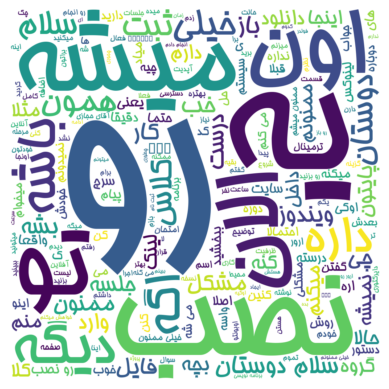

In [85]:
import matplotlib.pyplot as plt

plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')

In [75]:
text_content

'ﻣﻦ ﺑﺎ ﻋﻠﯽ ﺭﻓﺘﻢ ﺧﺮﯾﺪ.'